In [1]:
import nb_utils
import torch
import numpy as np
import matplotlib.pyplot as plt
from lightning_modules.BaseSdeGenerativeModel import BaseSdeGenerativeModel
from models.fcn import FCN
import pickle
from plot_utils import plot_spectrum

Moving cwd to /rds/user/js2164/hpc-work/repos/score_sde_pytorch


In [36]:
#path = 'logs/ksphere/n_1/dim_10/random_isometry/uniform_random/svd/svd_9000.pkl'
#path = 'logs/ksphere/n_1/dim_50/random_isometry/uniform_random/svd/svd_14000.pkl'
path = 'logs/line/sine_line/svd/svd_26500.pkl'
#path = 'logs/mammoth/ve_random/svd/svd_16500.pkl'


In [37]:
with open(path, 'rb') as f:
    svd = pickle.load(f)

In [38]:
import importlib
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_spectrum, plot_distribution

Aggregation mode: all


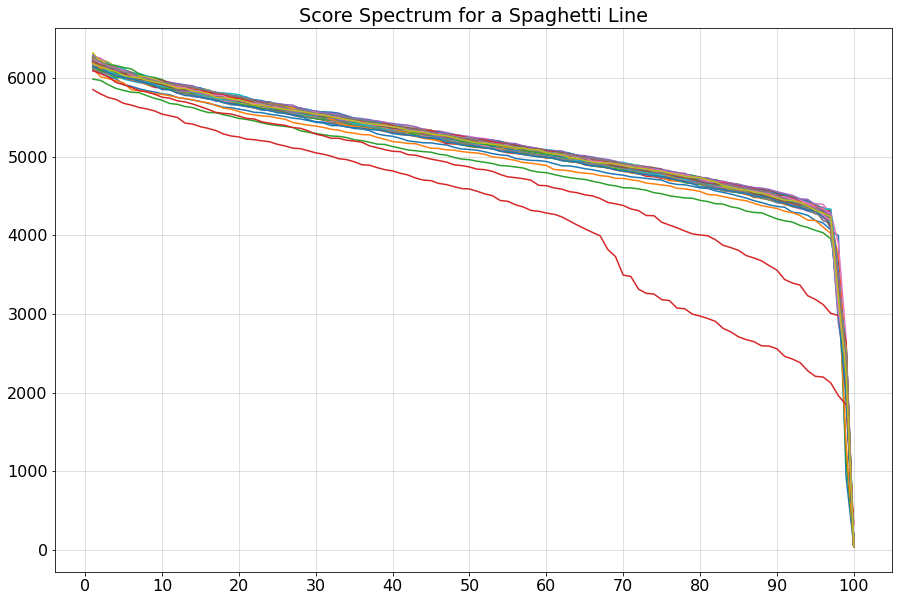

In [40]:
fig = plot_spectrum(svd, mode='all', title='Score Spectrum for a Spaghetti Line')

In [41]:
fig.savefig('figures/line', dpi=300, facecolor='white')

Aggregation mode: all


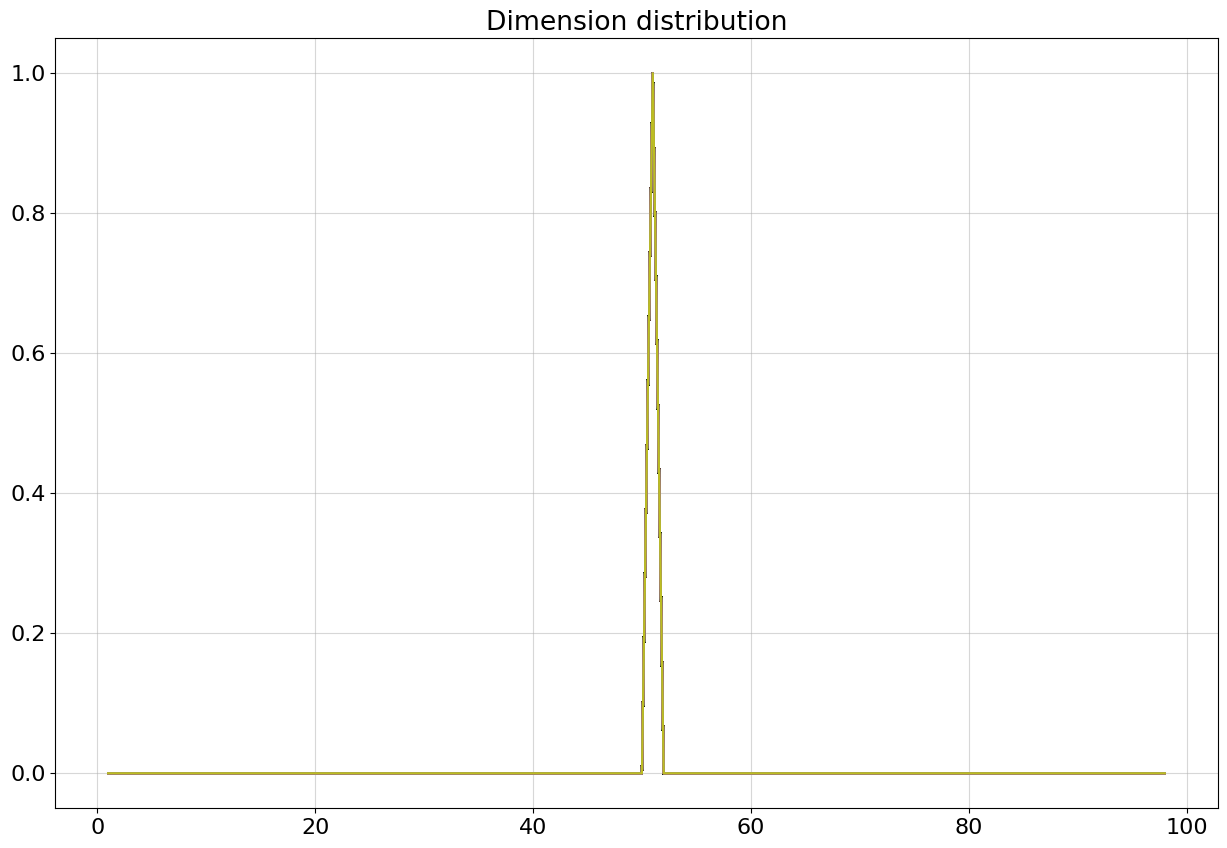

51.0


In [20]:
dims = plot_distribution(svd, mode='all')
print(np.mean(dims))